In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('max_columns', 60)


drive_path = '/content/drive/My Drive/Colab Notebooks/chiefs_attendance_model/'

In [ ]:
#mount file paths This is a great way to open files in Google Drive with Google Colab

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.listdir(drive_path)

['chiefs_data.csv',
 'chiefs_data_scrape.ipynb',
 'data_cleanse.ipynb',
 'chiefs_data_clean.csv',
 'Untitled0.ipynb']

In [ ]:
#load dataset
df = pd.read_csv(drive_path + 'chiefs_data.csv')

#only home games
df = df[df['game_location'] == 'home']

del[
    df['playoff_game'],
    df['game_location']
    
]

#get rid of byes

df = df[df['attendance'] != 'Bye']


df.shape

(112, 25)

In [ ]:
df.head()

,season,week,game_day_of_week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance
0,2005,1,Sun,September 11,1:00PM ET,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,"78,014"
3,2005,4,Sun,October 2,4:15PM ET,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,"78,742"
5,2005,6,Sun,October 16,1:00PM ET,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,"78,083"
8,2005,9,Sun,November 6,1:00PM ET,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,"79,033"
11,2005,12,Sun,November 27,1:00PM ET,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,"78,025"


In [ ]:
df['attendance'] = df['attendance'].str.replace(',','')

df['attendance'] = df['attendance'].astype('int')

In [ ]:
#this game was at Welbly Stadium so we are going to throw it out
df[df['attendance'] >= 80000]

,season,week,game_day_of_week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance
177,2015,8,Sun,November 1,9:36AM ET,W,NaN,3-5,Detroit Lions,45.0,10.0,24.0,340.0,134.0,206.0,NaN,16.0,276.0,195.0,81.0,2.0,21.11,10.04,4.13,83624


In [ ]:
df = df[df['attendance'] < 80000].reset_index()

try:
  del[df['index']]
except:
  pass
df.shape

(111, 25)

In [ ]:
try:
  del[df['Unnamed: 0']]
except:
  print('unnamed does not exist')
  pass

unnamed does not exist


In [ ]:
dummy = pd.get_dummies(df['game_day_of_week'], prefix = 'game_day')

dummy = dummy[['game_day_Sun','game_day_Mon']]

#attach day of week to dataset

df = pd.concat([df,dummy],axis = 1)

del[df['game_day_of_week']]


In [ ]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon
0,2005,1,September 11,1:00PM ET,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0
1,2005,4,October 2,4:15PM ET,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0
2,2005,6,October 16,1:00PM ET,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0
3,2005,9,November 6,1:00PM ET,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0
4,2005,12,November 27,1:00PM ET,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0


In [ ]:
pd.DataFrame(df.groupby(['game_day_Sun','game_day_Mon'])['attendance'].mean()).reset_index()

,game_day_Sun,game_day_Mon,attendance
0,0,0,75420.000000
1,0,1,74360.600000
2,1,0,73418.161616


In [ ]:
df.game_time.value_counts()

1:00PM ET     48
1:03PM ET     24
1:02PM ET     10
4:26PM ET      4
8:30PM ET      3
1:04PM ET      3
4:25PM ET      2
8:25PM ET      2
8:20PM ET      2
4:15PM ET      2
8:31PM ET      2
10:20PM ET     1
8:29PM ET      1
1:05PM ET      1
8:40PM ET      1
4:06PM ET      1
1:06PM ET      1
1:08PM ET      1
8:12PM ET      1
8:32PM ET      1
Name: game_time, dtype: int64

In [ ]:
#consolidate the times 

aa = [] 

for x in df['game_time']:
  aa.append(x[0:1])

df['game_time'] = aa

In [ ]:
df.game_time.value_counts()

1    89
8    13
4     9
Name: game_time, dtype: int64

In [ ]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon
0,2005,1,September 11,1,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0
1,2005,4,October 2,4,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0
2,2005,6,October 16,1,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0
3,2005,9,November 6,1,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0
4,2005,12,November 27,1,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0


In [ ]:
#split up wins and losses

wins = []
loss = []

for x in df['team_record']:
  w = x[0]
  l = x[-1]
  wins.append(int(w))
  loss.append(int(l))
  
df['wins'] = wins
df['losses'] = loss


In [ ]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses
0,2005,1,September 11,1,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0
1,2005,4,October 2,4,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2
2,2005,6,October 16,1,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2
3,2005,9,November 6,1,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3
4,2005,12,November 27,1,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4


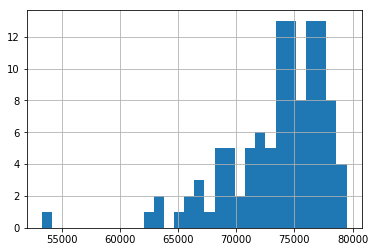

In [ ]:
df['attendance'].hist(bins = 30)

In [ ]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses
0,2005,1,September 11,1,W,NaN,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0
1,2005,4,October 2,4,L,NaN,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2
2,2005,6,October 16,1,W,NaN,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2
3,2005,9,November 6,1,W,NaN,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3
4,2005,12,November 27,1,W,NaN,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4


In [ ]:
#hotcode Overtime
aa = []

for x in df.overtime:
  if x == 'OT':
    aa.append(1)
  else:
    aa.append(0)
df['overtime'] = aa

In [ ]:
#win / loss ratio

df['win_ratio'] = df['wins'] / (df['wins'] + df['losses'])

In [ ]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,September 11,1,W,0,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0,1.000000
1,2005,4,October 2,4,L,0,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2,0.500000
2,2005,6,October 16,1,W,0,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,November 6,1,W,0,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3,0.625000
4,2005,12,November 27,1,W,0,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4,0.636364


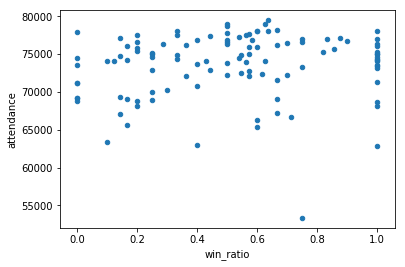

In [ ]:
df.plot('win_ratio','attendance', kind = 'scatter')

In [ ]:
df[['win_ratio','attendance']].corr()

,win_ratio,attendance
win_ratio,1.000000,0.109785
attendance,0.109785,1.000000


In [ ]:
df.corr()

,season,week,overtime,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
season,1.000000,0.028097,0.002178,0.136525,-0.192416,0.071873,0.050528,0.190289,-0.155430,-0.147714,0.181777,0.061292,0.024895,0.047020,0.111748,0.175413,0.006543,0.136261,-0.088181,-0.139320,0.125481,0.130819,-0.191423,0.195235
week,0.028097,1.000000,-0.022965,-0.003751,-0.043841,0.059466,0.180980,0.086336,0.170518,-0.087018,-0.034283,-0.079495,-0.123217,0.058456,-0.063226,0.064678,0.021159,-0.119037,-0.160655,-0.012591,-0.194476,0.382528,0.550208,-0.072277
overtime,0.002178,-0.022965,1.000000,0.021727,0.053364,0.167304,0.123637,0.176416,-0.026986,-0.107996,0.179024,0.213936,0.203950,0.010362,0.073701,0.040657,-0.019695,-0.120332,-0.127199,-0.127350,0.107438,-0.098301,0.120788,-0.079037
pts_off,0.136525,-0.003751,0.021727,1.000000,-0.063357,0.570362,0.617122,0.579124,0.233581,-0.232292,0.116083,-0.008337,0.224218,-0.305372,0.340368,0.751292,0.146190,-0.048842,0.175987,-0.098120,0.146373,0.153080,-0.249744,0.323102
pts_def,-0.192416,-0.043841,0.053364,-0.063357,1.000000,-0.014685,-0.087961,0.020120,-0.158724,0.433266,0.493310,0.558135,0.284200,0.352646,-0.193814,-0.218641,-0.735581,-0.065618,-0.122203,0.104887,-0.060394,-0.212377,0.030234,-0.171574
first_down_off,0.071873,0.059466,0.167304,0.570362,-0.014685,1.000000,0.779154,0.613002,0.439296,-0.059779,-0.112181,-0.199292,0.060407,-0.338568,-0.003206,0.696990,-0.033740,-0.372063,0.067194,-0.048225,0.008844,0.162079,-0.146221,0.209880
yards_off,0.050528,0.180980,0.123637,0.617122,-0.087961,0.779154,1.000000,0.756328,0.600982,-0.098725,-0.170444,-0.223485,0.050296,-0.356754,0.099693,0.702012,0.103945,-0.429065,-0.095642,-0.029673,-0.009383,0.122350,-0.111491,0.199309
pass_yds_off,0.190289,0.086336,0.176416,0.579124,0.020120,0.613002,0.756328,1.000000,-0.068332,-0.104154,0.012282,-0.035812,0.093533,-0.169444,0.173538,0.578058,-0.011375,-0.237250,0.067044,-0.008419,-0.031839,0.130196,-0.133430,0.206707
rush_yds_off,-0.155430,0.170518,-0.026986,0.233581,-0.158724,0.439296,0.600982,-0.068332,1.000000,-0.026310,-0.274937,-0.297067,-0.037572,-0.337041,-0.061692,0.364344,0.172417,-0.364475,-0.227768,-0.034967,0.024590,0.027520,-0.007009,0.051407
to_off,-0.147714,-0.087018,-0.107996,-0.232292,0.433266,-0.059779,-0.098725,-0.104154,-0.026310,1.000000,0.011983,0.055963,0.014988,0.053926,-0.182168,-0.464710,-0.161303,0.017663,-0.016430,-0.164993,0.114634,-0.139023,-0.044591,-0.087254


In [ ]:
df.head()

,season,week,game_date,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,September 11,1,W,0,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0,1.000000
1,2005,4,October 2,4,L,0,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2,0.500000
2,2005,6,October 16,1,W,0,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,November 6,1,W,0,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3,0.625000
4,2005,12,November 27,1,W,0,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4,0.636364


In [ ]:
del[df['game_date']]

In [ ]:
df.head()

,season,week,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,1,W,0,1-0,New York Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0,1.000000
1,2005,4,4,L,0,2-2,Philadelphia Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2,0.500000
2,2005,6,1,W,0,3-2,Washington Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,1,W,0,5-3,Oakland Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3,0.625000
4,2005,12,1,W,0,7-4,New England Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4,0.636364


In [ ]:
#use only last word for opponent
#this will account for the St. Louis Rams
#movign to Los Angeles

aa = []

for x in df['opp']:
  word_splitter = x.split()
  aa.append(word_splitter[-1])
  
df['opp'] = aa

In [ ]:
df.head()

,season,week,game_time,game_outcome,overtime,team_record,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,1,W,0,1-0,Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0,1.000000
1,2005,4,4,L,0,2-2,Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2,0.500000
2,2005,6,1,W,0,3-2,Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,1,W,0,5-3,Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3,0.625000
4,2005,12,1,W,0,7-4,Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4,0.636364


In [ ]:
del[
    df['game_outcome'],
    df['overtime'],
    df['team_record']
]

In [ ]:
df.head()

,season,week,game_time,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio
0,2005,1,1,Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0,1.000000
1,2005,4,4,Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2,0.500000
2,2005,6,1,Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2,0.600000
3,2005,9,1,Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3,0.625000
4,2005,12,1,Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4,0.636364


In [ ]:
df['game_time'].unique()

dummy = pd.get_dummies(df['game_time'], prefix = 'gametime')

df = pd.concat([df,dummy], axis = 1)

df.head()

,season,week,game_time,opp,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_4,gametime_8
0,2005,1,1,Jets,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0,1.000000,1,0,0
1,2005,4,4,Eagles,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2,0.500000,0,1,0
2,2005,6,1,Redskins,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2,0.600000,1,0,0
3,2005,9,1,Raiders,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3,0.625000,1,0,0
4,2005,12,1,Patriots,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4,0.636364,1,0,0


In [ ]:
#dummy opponents. Might need to do feature reduction later:

dummy = pd.get_dummies(df['opp'],prefix = 'opp')

df = pd.concat([df, dummy], axis = 1)

del[df['opp']]

In [ ]:
df.head()

,season,week,game_time,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_4,gametime_8,opp_49ers,opp_Bears,opp_Bengals,opp_Bills,opp_Broncos,opp_Browns,opp_Buccaneers,opp_Cardinals,opp_Chargers,opp_Colts,opp_Cowboys,opp_Dolphins,opp_Eagles,opp_Falcons,opp_Giants,opp_Jaguars,opp_Jets,opp_Packers,opp_Panthers,opp_Patriots,opp_Raiders,opp_Rams,opp_Ravens,opp_Redskins,opp_Saints,opp_Seahawks,opp_Steelers,opp_Texans,opp_Titans,opp_Vikings
0,2005,1,1,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2005,4,4,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2,0.500000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2005,6,1,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2,0.600000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2005,9,1,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3,0.625000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2005,12,1,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4,0.636364,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(111, 57)

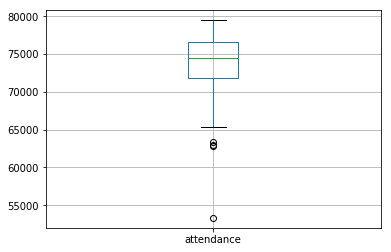

In [ ]:
df.boxplot('attendance')

In [ ]:
df.head()

,season,week,game_time,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_4,gametime_8,opp_49ers,opp_Bears,opp_Bengals,opp_Bills,opp_Broncos,opp_Browns,opp_Buccaneers,opp_Cardinals,opp_Chargers,opp_Colts,opp_Cowboys,opp_Dolphins,opp_Eagles,opp_Falcons,opp_Giants,opp_Jaguars,opp_Jets,opp_Packers,opp_Panthers,opp_Patriots,opp_Raiders,opp_Rams,opp_Ravens,opp_Redskins,opp_Saints,opp_Seahawks,opp_Steelers,opp_Texans,opp_Titans,opp_Vikings
0,2005,1,1,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2005,4,4,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2,0.500000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2005,6,1,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2,0.600000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2005,9,1,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3,0.625000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2005,12,1,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4,0.636364,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv(drive_path + 'chiefs_data_clean.csv',index = False)